# Import libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm
from sorting import quick, merge

# Task 1. Experimental time complexity analysis

# Goal
### Experimental study of the time complexity of different algorithms.

# Problems and methods
### For each n from 1 to 2000, measure the average computer execution time (using timestamps) of programs implementing the algorithms and functions below for five runs. Plot the data obtained showing the average execution time as a function of n. Conduct the theoretical analysis of the time complexity of the algorithms in question and compare the empirical and theoretical time complexities.

# Brief theoretical part
### Provide with brief theoretical information related to the task, for example, definitions, descriptions of algorithms, methodological approaches to solving the assigned tasks (at most 2 pages)
### The time complexity is a characteristic of the algorithm designed to give an idea of the amount of time required for the algorithm to work on a certain amount of data. The estimation of the time complexity of the algorithm is carried out by counting the number of elementary operations (additions, multiplications, etc.) performed by the algorithm for a given amount of data. It is assumed that the execution of each elementary operation requires a fixed amount of time.
### Due to the fact that the running time of the algorithm can be different for data of different volumes, it is customary to determine the time complexity using the function T, reflecting the dependence of the running time of the algorithm T(n) on the volume n of the input data.
### Frequently the time complexity T(n) is written in the O-large format. In such terms, the statement that the time complexity of some algorithm is O(t(n)), where t(n) > 0 is some function, means that with an increase in the volume of n input data, the running time of the algorithm will increase asymptotically no faster than C · t(n) with some fixed constant C > 0. For example, O(n2) is the time complexity of the algorithm for sorting elements of a real vector v of dimension n by a bubble, and O(n3) is the time complexity of the algorithm for the usual multiplication of two matrices of size n × n. In this laboratory work, the time complexity of many standard algorithms is given.
### In order to still get an idea of the time complexity of the algorithm, an empirical approach can be applied. It is assumed that the algorithm is run under the same conditions, in particular, on the same computer that does not perform any additional computational processes that can significantly affect the running time of the algorithm in question. The presence of the same conditions at each measurement is fundamentally important for the quality of the results obtained. It is worth noting that even when using the same computer, this cannot always be achieved – numerous factors, including background processes of the system, can influence the result. A reasonable compromise in such a situation is to average time measurements over several launches for the same amount of data.


# Point 1 Generate an n-dimensional random vector 𝒗 = [𝑣0, 𝑣1, ... , 𝑣n] with non-negative elements. For 𝒗, implement the following calculations and algorithms:

In [68]:
def execution_time(func, vector):
    start = timeit.default_timer()
    func(vector)
    end =  timeit.default_timer()
    return end - start

In [118]:
def time_operation(func, max_n = 2000, count = 5):
    avg_time = []
    for n in tqdm(range(1, max_n + 1)):
        t = 0
        for i in range(count):
            vector = np.random.random(n)
            t += execution_time(func, vector)
        avg_time.append(t/count)
    return avg_time

### Point 1.1 Constant Function

In [70]:
def constant(vector):
    return 0

In [119]:
y = [1 for i in range(1, 2001)]
x = [i for i in range(1, 2001)]
n = np.arange(1, 2001)

100%|██████████| 2000/2000 [00:00<00:00, 36138.17it/s]


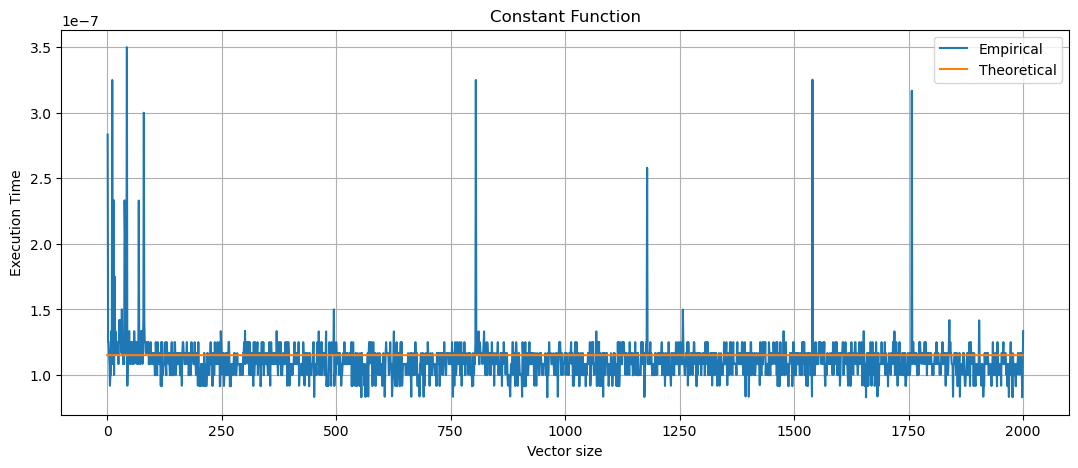

In [82]:
# Visualization

plt.figure(figsize=(13,5))
coaf = np.polyfit(n, time_operation(constant), 0)
polynom_fn = np.poly1d(coaf)

plt.plot(x, time_operation(constant), polynom_fn(n))


plt.title('Constant Function')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.2 Sum of Elements

In [15]:
def sum_of_elements(vector):
    sum = 0
    for i in vector:
        sum += i
    return sum

100%|██████████| 2000/2000 [00:00<00:00, 3028.13it/s]


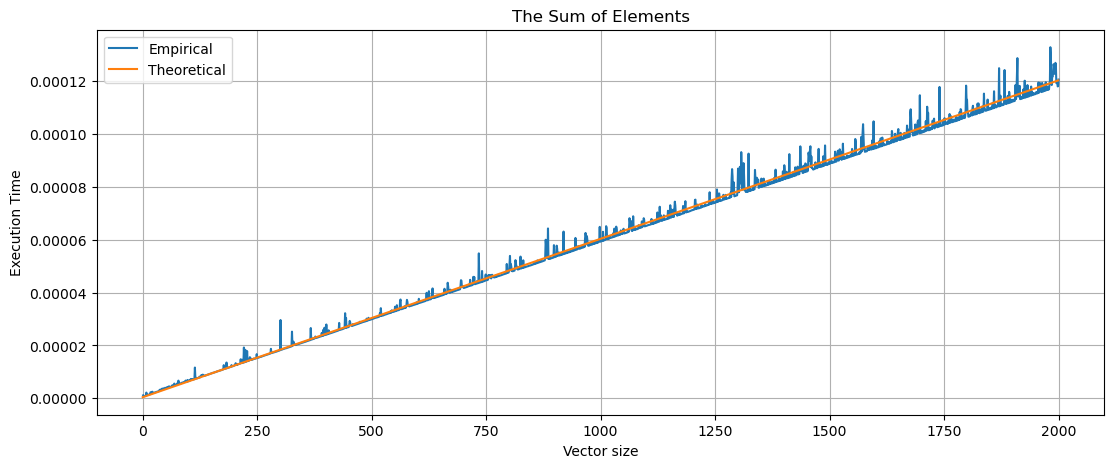

In [84]:
# Visualization

plt.figure(figsize=(13,5))
coaf = np.polyfit(n, time_operation(sum_of_elements), 1)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(sum_of_elements), polynom_fn(n))



plt.title('The Sum of Elements')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.3 Product of Elements

In [17]:
def product_of_elements(vector):
    product = 1
    for i in vector:
        product *= i
    return product

100%|██████████| 2000/2000 [00:00<00:00, 3797.79it/s]


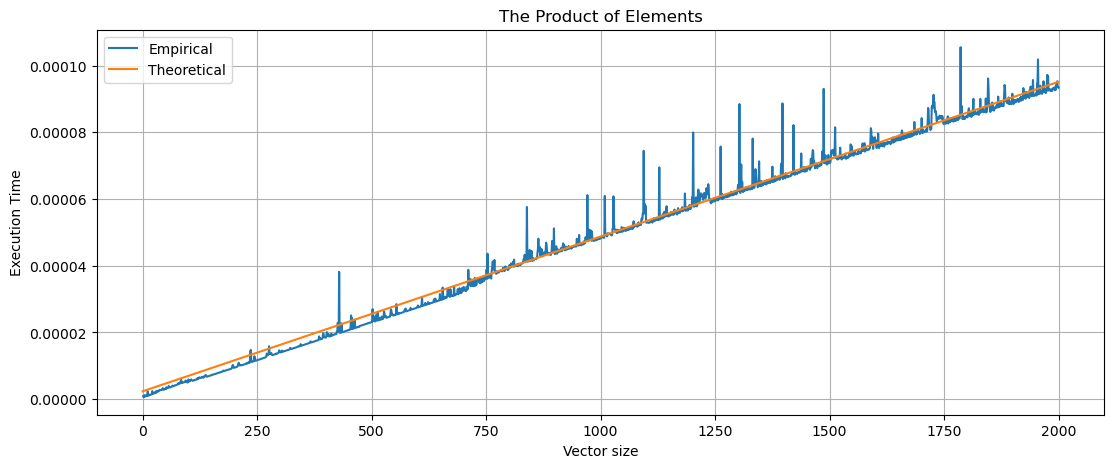

In [104]:
# Visualization

plt.figure(figsize=(13,5))
coaf = np.polyfit(n, time_operation(product_of_elements), 1)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(product_of_elements), polynom_fn(n))

plt.title('The Product of Elements')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.4 Polynomial and Horner Method

In [146]:
def polynomial(vector):
    x = 1.5
    P = 0
    for i in range(len(vector)):
        P = P + vector[i]*np.power(x,i)
    return P

def horner(vector):
    x = 1.5
    P = vector[0]
    for i in range(1, len(vector)):
        P += P*x + vector[i]
    return P

 87%|████████▋ | 1741/2000 [00:08<00:02, 101.01it/s]/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_78813/1138109311.py:5: RuntimeWarning: overflow encountered in double_scalars
  P = P + vector[i]*np.power(x,i)
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_78813/1138109311.py:5: RuntimeWarning: overflow encountered in power
  P = P + vector[i]*np.power(x,i)
100%|██████████| 2000/2000 [00:11<00:00, 172.10it/s]


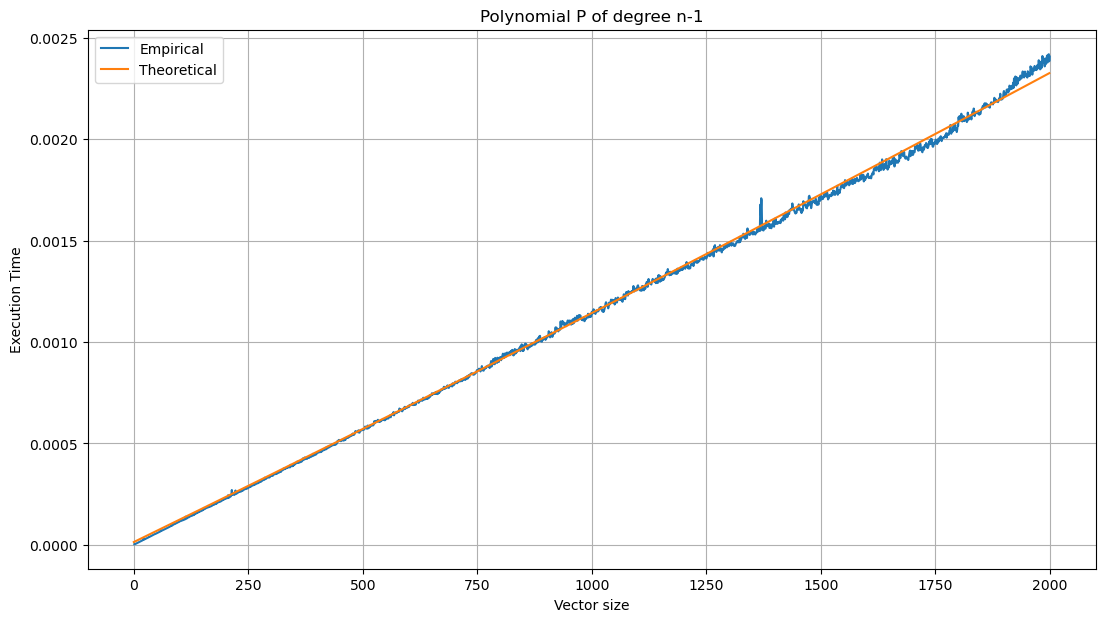

In [150]:
# Visualization

plt.figure(figsize=(13,7))
coaf = np.polyfit(n, time_operation(polynomial), 2)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(polynomial), polynom_fn(n))

plt.title('Polynomial P of degree n-1')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

 23%|██▎       | 456/2000 [00:00<00:00, 4557.27it/s]/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_78813/4293015761.py:12: RuntimeWarning: overflow encountered in double_scalars
  P += P*x + vector[i]
100%|██████████| 2000/2000 [00:01<00:00, 1060.87it/s]


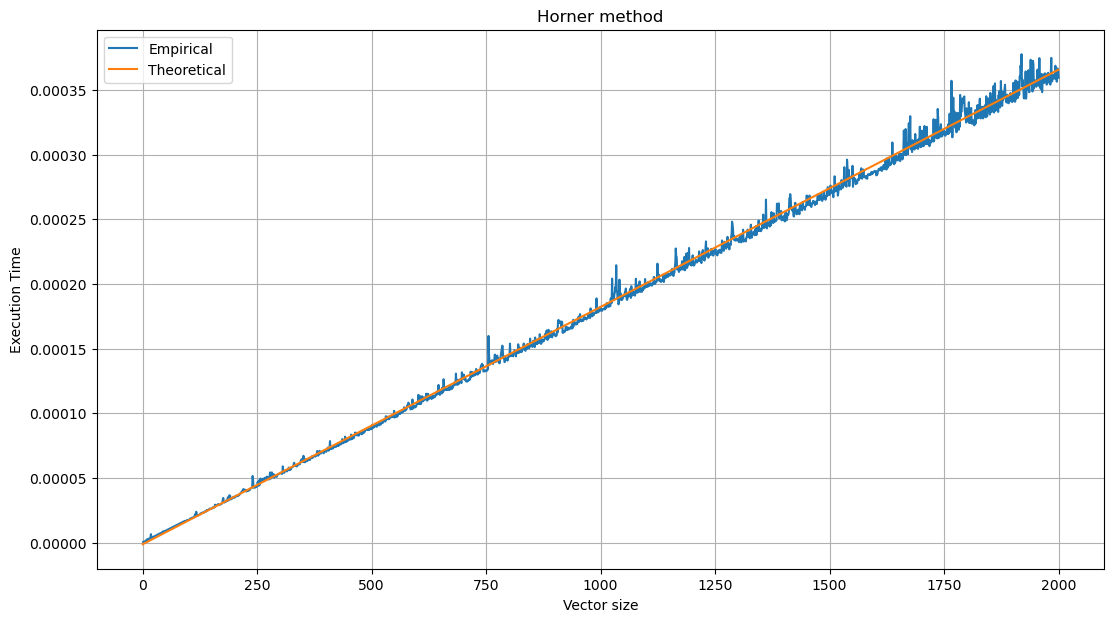

In [140]:
# Visualization
# x_poly = [i for i in range(1, 1001)]
# n_poly = np.arange(1, 1001)

plt.figure(figsize=(13,7))
coaf = np.polyfit(n, time_operation(horner), 1)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(horner), polynom_fn(n))

plt.title('Horner method')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.5 Bubble Sort

In [88]:
def bubble_sort(vector):
    for i in range(len(vector)-1):
        for j in range(0, len(vector)-i-1):
            if vector[j] > vector[j + 1]:
                vector[j], vector[j + 1] = vector[j + 1], vector[j]
    return vector

100%|██████████| 2000/2000 [28:53<00:00,  1.15it/s]


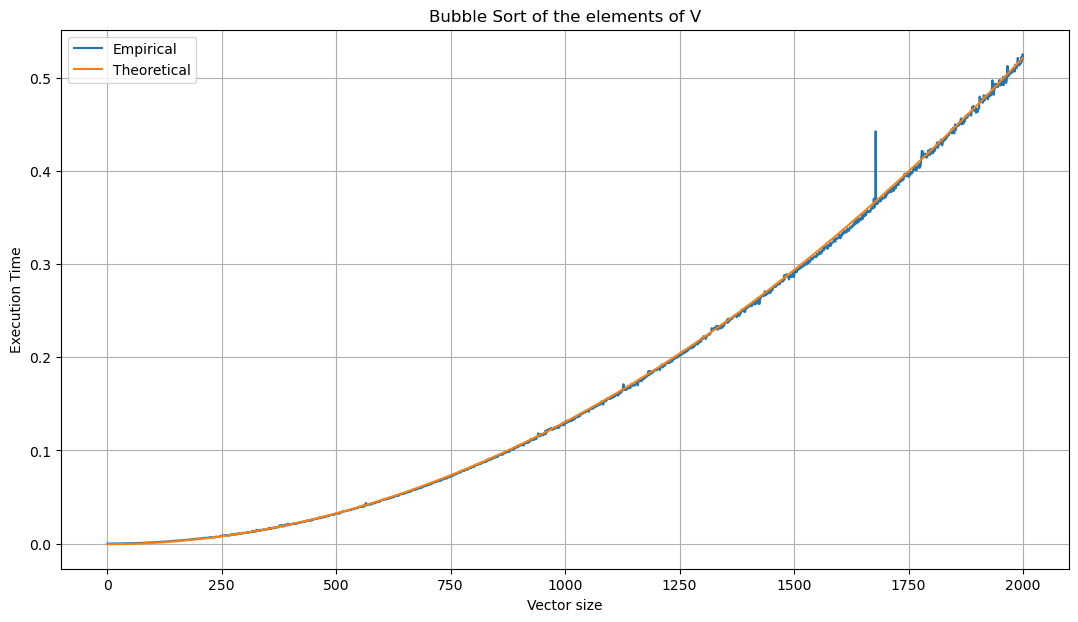

In [89]:
# Visualization

plt.figure(figsize=(13,7))
coaf = np.polyfit(n, time_operation(bubble_sort), 2)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(bubble_sort), polynom_fn(n))

plt.title('Bubble Sort of the elements of V')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.6 Quick Sort

100%|██████████| 2000/2000 [00:34<00:00, 58.47it/s] 


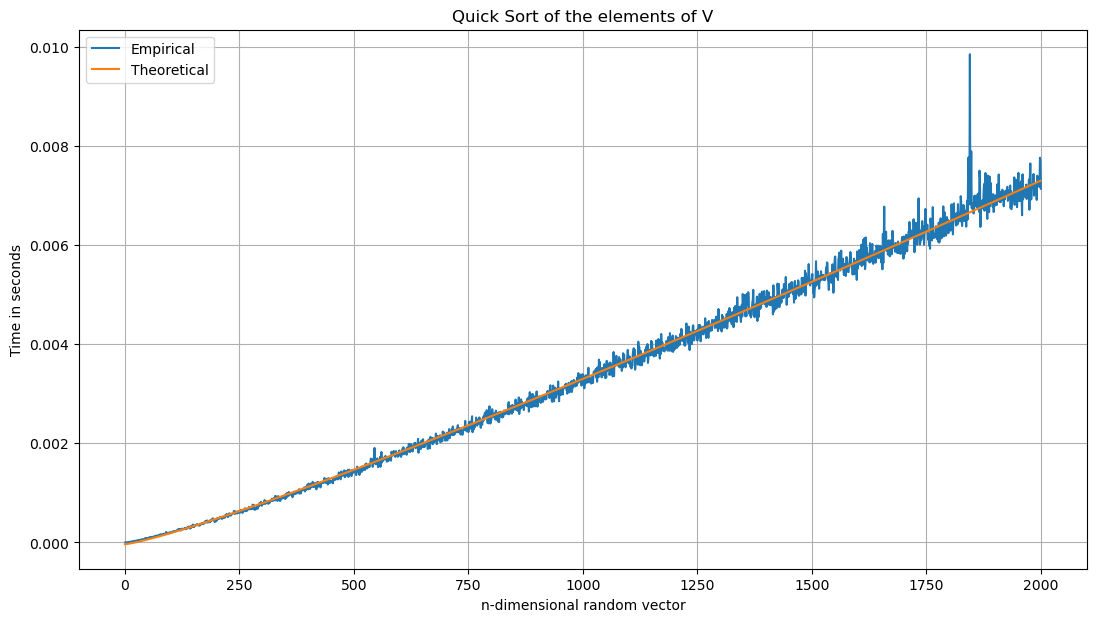

In [94]:
# Visualization

plt.figure(figsize=(13,7))
coaf = np.polyfit(n*np.log(n), time_operation(quick), 1)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(quick), polynom_fn(n*np.log(n)))

plt.title('Quick Sort of the elements of V')
plt.xlabel('n-dimensional random vector')
plt.ylabel('Time in seconds')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

### Point 1.7 Timsort

100%|██████████| 2000/2000 [00:02<00:00, 940.44it/s] 


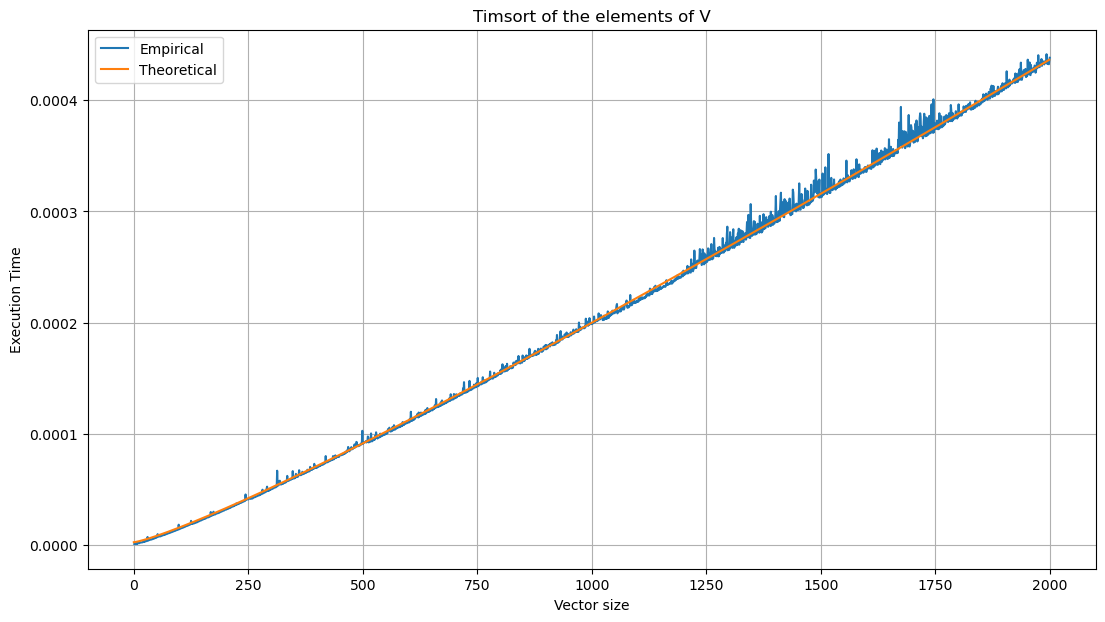

In [96]:
# Visualization

plt.figure(figsize=(13,7))
coaf = np.polyfit(n*np.log(n), time_operation(sorted), 1)
polynom_fn = np.poly1d(coaf)
plt.plot(x, time_operation(sorted), polynom_fn(n*np.log(n)))# Tim Sort is the default sorting algorithm used by Python’s sorted() and list.sort() functions


plt.title('Timsort of the elements of V')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

# Point 2 Generate random matrices 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements. Find the usual matrix product for 𝐴 and 𝐵

In [101]:
def product_of_matrices(n = 2000, count = 5):
    avg_time = []
    for n in tqdm(range(1, n + 1)):
        t = 0
        A = np.random.random((n, n))
        B = np.random.random((n, n))
        for i in range(count):
            start = timeit.default_timer()
            product = np.dot(A, B)
            t += timeit.default_timer() - start
        avg_time.append(t/count)
    return avg_time

100%|██████████| 2000/2000 [07:53<00:00,  4.22it/s] 


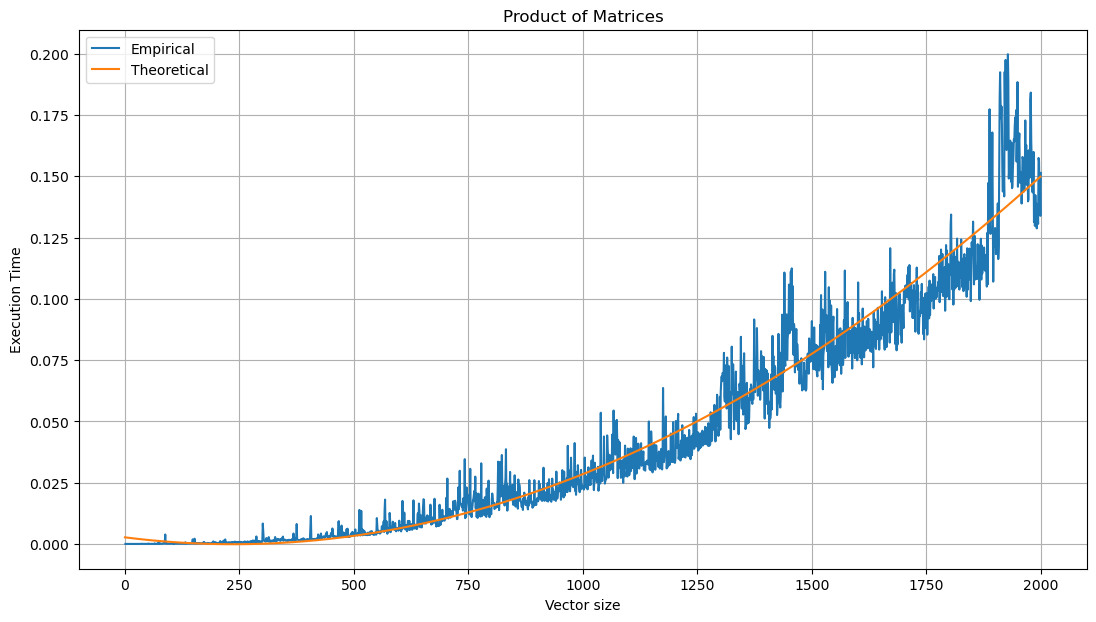

In [103]:
# Visualization

plt.figure(figsize=(13,7))
coaf = np.polyfit(n, product_of_matrices(), 3)
polynom_fn = np.poly1d(coaf)
plt.plot(x, product_of_matrices(), polynom_fn(n))

plt.title('Product of Matrices')
plt.xlabel('Vector size')
plt.ylabel('Execution Time')
plt.legend(['Empirical', 'Theoretical'])
plt.grid()

# Point 3 Describe the data structures and design techniques used within the algorithms.

### Constant function – time complexity in big O notation is O(1) as there no calculations that might depend on the size of  input dataset.
### Sum of elements – time complexity of this calculation is O(n).
### Product of elements – we iterate over all elements, that is why time complexity is the same as Sum of Elements, O(n).
### Polynomial Horner method - is an algorithm for polynomial evaluation. The algorithm is based on Horner's rule, in which a polynomial is written in nested form. This allows the evaluation of a polynomial of degree n with only n multiplications and n additions. This is optimal, since there are polynomials of degree n that cannot be evaluated with fewer arithmetic operations. Time complexity is O(n2).
### Bubble Sort - a bubble sort algorithm goes through a list of data a number of times, comparing two items that are side by side to see which is out of order. It will keep going through the list of data until all the data is sorted into order. The time complexity of this sorting in big O notations is O(n2).
### Quick Sort – is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. For this reason, it is sometimes called partition-exchange sort. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting. Mathematical analysis of quicksort shows that, on average, the algorithm takes O(n logn) comparisons to sort n items. In the worst case, it makes O(n2) comparisons.
### Tim Sort – is a hybrid, stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data. The algorithm finds subsequences of the data that are already ordered (runs) and uses them to sort the remainder more efficiently. This is done by merging runs until certain criteria are fulfilled. In the worst case, Timsort takes O(n logn) comparisons to sort an array of n elements. In the best case, which occurs when the input is already sorted, it runs in linear time, meaning that it is an adaptive sorting algorithm.
### Product of Matrices – Directly applying the mathematical definition of matrix multiplication gives an algorithm that requires n3 field operations to multiply two n × n matrices over that field (O(n3) in big O notation). As of July 2023, the best announced bound on the asymptotic complexity of a matrix multiplication algorithm is O(n2.371552) time, given by Williams, Xu, Xu, and Zhou announced in a preprint.
### In this work we used list and array data structure. In computer science, a list or sequence is an abstract data type that represents a finite number of ordered values, where the same value may occur more than once.


# Conclusion

## In this practical work was considered the time complexity of different algorithms and machines. The measured average time complexity is close to the theoretical ones. Some deviations that we could see on the graphs is explained by processor execution several tasks in one time. All the tasks and goals were completed.